In [21]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *
from MicrogridPSO_pareto_animation import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))
#print(dir(Make_animation))

In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 121.8,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
# len(PSO.Target_input.index)

In [4]:
%%time

#計算結果を実行
iterations_PSO(PSO)

Inform the number of iterations: 70
Inform the number of particles: 10
Inform w: 0.5
Inform c1: 1.5
Inform c2: 1
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 70 n_particles: 10 w: 0.5 c1: 1.5 c2: 1.0 particle: {'particle_position_vector': array([[6.80633528e+03, 1.79849018e+01, 9.37886023e+01, 2.31103235e+01],
       [7.52082419e+03, 1.00905100e+01, 1.63515878e+01, 1.89965195e+01],
       [3.58703221e+03, 1.94838585e+01, 1.79272355e+01, 1.83025292e+01],
       [5.10801610e+03, 1.13409038e+00, 4.30422811e+01, 7.12631156e-01],
       [8.25341076e+03, 8.04531288e+00, 8.86520118e+01, 1.05496680e+01],
       [9.20811140e+03, 9.90504866e+00, 9.23972976e+01, 4.08089911e+00],
       [7.11502234e+03, 1.97255702e+01, 8.93478718e+01, 7.13680529e+00],
       [9.46152095e+03, 1.05606787e+00, 3.73196878e+01, 2.84970197e+01],
       [1.03071461e+03, 6.68575585e+00, 7.93550110e+01, 1.27434560e+01],
       [2.66304866e+03, 1.85664507e+01, 9.78781233e+01, 1.72

      * 6238 [h]-----PSO.check is False.
      * 6238h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 4.080899111280106 4.622277613889968 5.665925486 4.622277613889968 0.0
      *particle_position_vector is error.loop= 1 [9.20811140e+03 9.90504866e+00 9.23972976e+01 4.08089911e+00]
      *particle_position_vector is updated by error. [3677.58685074   17.79641757   10.70964682   20.95413711]
-----particle_position[ 5 ]  42008884.5271654 [yen].  [3677.58685074   17.79641757   10.70964682   20.95413711]
      *personal best is updated.particle[ 5 ]: [3677.58685074   17.79641757   10.70964682   20.95413711]
      *previous_velocity_vector[ 5 ] [0 0 0 0]
      *new_velocity [4563.2705768    -9.72435347   77.72853752  -10.37592548]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.24085743e+03 8.07206411e+00 8.84381843e+01 1.05782116e+01]
-----partic

-----particle_position[ 9 ]  17791821.94117169 [yen].  [6555.15714048   11.24144939   91.45474207   12.57157519]
      *personal best is updated.particle[ 9 ]: [6555.15714048   11.24144939   91.45474207   12.57157519]
      *previous_velocity_vector[ 9 ] [ 1.46428739e+02  3.99817525e-02  2.52282356e+00 -8.62801241e-01]
      *new_velocity [ 1.64958621e+02 -1.52502944e-01  1.09723560e+00 -5.39889449e-01]
      *particle_position_vector[ 9 ] is updated. particle_position: [6720.11576191   11.08894644   92.55197767   12.03168574]
-------iteration = 2 -----------
[[9.40578335e+03 9.83440718e+00 8.82576017e+01 1.51219131e+01]
 [8.81228976e+03 8.84549609e+00 8.31685919e+01 1.31350925e+01]
 [7.53989380e+03 1.13337195e+01 7.68457983e+01 1.37681436e+01]
 [9.97788929e+03 5.33522029e+00 8.46278277e+01 4.38243502e+00]
 [8.47988573e+03 6.10777203e+00 9.10545938e+01 8.99777006e+00]
 [8.35409491e+03 7.10329368e+00 8.96394754e+01 9.80226268e+00]
 [8.16523296e+03 9.01308779e+00 8.92684497e+01 9.7493225

-----particle_position[ 9 ]  17777388.624231886 [yen].  [6720.11576191   11.08894644   92.55197767   12.03168574]
      *personal best is updated.particle[ 9 ]: [6720.11576191   11.08894644   92.55197767   12.03168574]
      *previous_velocity_vector[ 9 ] [ 2.13537077e+03  5.89908036e-01  2.64396721e+01 -9.97400460e+00]
      *new_velocity [ 1.61130436e+03 -1.24380443e+00  1.27572720e+01 -5.92422373e+00]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.33142012e+03 9.84514201e+00 1.05309250e+02 6.10746202e+00]
-------iteration = 3 -----------
[[8.43191178e+03 8.16006898e+00 8.89699712e+01 1.07317553e+01]
 [7.92142543e+03 7.46161088e+00 8.72496951e+01 9.13263041e+00]
 [7.76398003e+03 7.52643934e+00 8.99587016e+01 8.72008091e+00]
 [6.97847492e+03 1.13379294e+01 7.95192341e+01 1.50220056e+01]
 [9.50485683e+03 2.84357460e+00 1.00104416e+02 5.14972063e+00]
 [8.90868448e+03 5.13797939e+00 9.46380471e+01 7.60896258e+00]
 [8.47812657e+03 7.70173234e+00 9.19698143e+01 8.56

-----particle_position[ 7 ]  17538268.557485253 [yen].  [8.64604485e+03 5.40020647e+00 9.18885689e+01 8.59551669e+00]
      *personal best is updated.particle[ 7 ]: [8.64604485e+03 5.40020647e+00 9.18885689e+01 8.59551669e+00]
      *previous_velocity_vector[ 7 ] [ 1.11242643e+03 -1.20626612e-01 -3.56839576e+00 -2.46532778e+00]
      *new_velocity [-10.3235614    1.55137606  -5.41105705  -0.81272665]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.63572128e+03 6.95158253e+00 8.64775118e+01 7.78279003e+00]
      * 6238 [h]-----PSO.check is False.
      * 6238h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 0.5074314322062285 2.1117407735446525 5.665925486 4.8037444541804275 2.692003680635775
      *particle_position_vector is error.loop= 1 [7.91921799e+03 8.18278396e+00 1.14247222e+02 5.07431432e-01]
      *original_particle_position_vector [7

      * 6237 [h]-----PSO.check is False.
      * 6237h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 2.037607580718385 4.0298690016360315 5.546762589 4.834980660687313 0.8051116590512812
      *particle_position_vector is error.loop= 1 [1.17648414e+04 5.16902605e+00 9.28539132e+01 2.03760758e+00]
      *original_particle_position_vector [1.17648414e+04 5.16902605e+00 9.28539132e+01 2.03760758e+00]
      *original_previous_velocity_vector [ 2.85615697e+03  3.10466643e-02 -1.78413395e+00 -5.57135500e+00]
      *loop= 1 new_velocity: [-576.88050134   -2.24200271  -24.00130426    2.46797801] original_particle_position_vector [1.11879609e+04 2.92702334e+00 6.88526089e+01 4.50558559e+00]
      *particle_position_vector is updated by error. [1.11879609e+04 2.92702334e+00 6.88526089e+01 4.50558559e+00]
      * 6214 [h]-----PSO.check is False.
      * 6214h: Error! diesel 

-----particle_position[ 5 ]  18805588.36932122 [yen].  [7261.41502077   13.51962903   90.83708692   15.80033104]
      *previous_velocity_vector[ 5 ] [-6.29460457e+02  7.37740681e-01  8.30464859e-01 -1.46283737e-01]
      *new_velocity [1255.20250882   -7.24100798  -16.84902016   -5.78776313]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.51661753e+03 6.27862105e+00 7.39880668e+01 1.00125679e+01]
-----particle_position[ 6 ]  18135614.670921206 [yen].  [9.79465129e+03 6.98311317e+00 8.70384821e+01 5.53009484e+00]
      *previous_velocity_vector[ 6 ] [1255.20250882   -7.24100798  -16.84902016   -5.78776313]
      *new_velocity [615.49257916  -3.78637035  -9.23213566  -2.80878029]
      *particle_position_vector[ 6 ] is updated. particle_position: [1.04101439e+04 3.19674282e+00 7.78063464e+01 2.72131455e+00]
-----particle_position[ 7 ]  17180806.91719992 [yen].  [9.17587698e+03 5.01829949e+00 7.89403715e+01 7.33277767e+00]
      *personal best is updated.particle[ 

      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 4.464183198194482 5.854900028465483 5.872645202 5.854900028465483 0.0
      *particle_position_vector is error.loop= 2 [9.98510711e+03 6.79241024e-01 6.48707530e+01 4.46418320e+00]
      *loop= 2 new_velocity: [-280.73460346   -0.54057563   -4.32132747    1.19418245] original_particle_position_vector [9.70437251e+03 1.38665393e-01 6.05494255e+01 5.65836565e+00]
      *particle_position_vector is updated by error. [9.70437251e+03 1.38665393e-01 6.05494255e+01 5.65836565e+00]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.658365649745678 5.869022568249715 5.872645202 5.869022568249715 0.0
 

-----particle_position[ 3 ]  16324598.04800962 [yen].  [9.45355462e+03 2.34687085e+00 6.47097297e+01 7.56168474e+00]
      *personal best is updated.particle[ 3 ]: [9.45355462e+03 2.34687085e+00 6.47097297e+01 7.56168474e+00]
      *previous_velocity_vector[ 3 ] [-1.66128872e+02 -2.98758727e-01 -1.16057601e+00 -9.36774927e-02]
      *new_velocity [-3.01501839e+02 -1.77957708e-01 -5.03216823e-01 -1.04787023e-01]
      *particle_position_vector[ 3 ] is updated. particle_position: [9.15205278e+03 2.16891314e+00 6.42065128e+01 7.45689771e+00]
-----particle_position[ 4 ]  16146773.89150028 [yen].  [9.09716197e+03 2.48360326e+00 6.54513509e+01 7.47936865e+00]
      *personal best is updated.particle[ 4 ]: [9.09716197e+03 2.48360326e+00 6.54513509e+01 7.47936865e+00]
      *previous_velocity_vector[ 4 ] [-3.01501839e+02 -1.77957708e-01 -5.03216823e-01 -1.04787023e-01]
      *new_velocity [-1.29861995e+02 -1.50843230e-01 -4.75950577e-01 -5.11604949e-02]
      *particle_position_vector[ 4 ] is 

-----particle_position[ 7 ]  16318908.093286784 [yen].  [9.37000567e+03 4.42608909e+00 6.05023493e+01 8.06990471e+00]
      *personal best is updated.particle[ 7 ]: [9.37000567e+03 4.42608909e+00 6.05023493e+01 8.06990471e+00]
      *previous_velocity_vector[ 7 ] [88.29918051 -0.80565533 -2.79503811 -0.86786821]
      *new_velocity [-449.54208801   -2.4065536     3.02580248   -0.91348289]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.92046358e+03 2.01953549e+00 6.35281517e+01 7.15642181e+00]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.34931833510827 5.932250324725954 5.872645202 5.932250324725954 0.0
      *particle_position_vector is error.loop= 1 [ 9.17032926e+03 -2.28153557e+00  6.83612147e+01  5.34931834e+00]
      *original_particle_position_vector [ 9.17032926e+03 -2.28153557

-----particle_position[ 2 ]  16105429.354953805 [yen].  [8.97920692e+03 2.38481498e+00 6.60499297e+01 7.44160464e+00]
      *personal best is updated.particle[ 2 ]: [8.97920692e+03 2.38481498e+00 6.60499297e+01 7.44160464e+00]
      *previous_velocity_vector[ 2 ] [-82.27741034   0.28166094   0.1010015    0.13575558]
      *new_velocity [-1.17823235e+02  1.01935454e-01 -4.86737899e-01  1.42197156e-01]
      *particle_position_vector[ 2 ] is updated. particle_position: [8.86138369e+03 2.48675044e+00 6.55631918e+01 7.58380180e+00]
-----particle_position[ 3 ]  16150470.070108583 [yen].  [8.89672647e+03 2.19723044e+00 6.49352355e+01 7.44548280e+00]
      *personal best is updated.particle[ 3 ]: [8.89672647e+03 2.19723044e+00 6.49352355e+01 7.44548280e+00]
      *previous_velocity_vector[ 3 ] [-1.17823235e+02  1.01935454e-01 -4.86737899e-01  1.42197156e-01]
      *new_velocity [-77.73334506   0.10147513  -0.15402995   0.12067846]
      *particle_position_vector[ 3 ] is updated. particle_posi

-----particle_position[ 5 ]  15930792.434756046 [yen].  [8.71362673e+03 2.39569329e+00 6.54751436e+01 7.68510131e+00]
      *personal best is updated.particle[ 5 ]: [8.71362673e+03 2.39569329e+00 6.54751436e+01 7.68510131e+00]
      *global best is updated. [8.71362673e+03 2.39569329e+00 6.54751436e+01 7.68510131e+00]
variables:  {'pv_cap_max': 8713.626732716959, 'wind_cap_max': 2.395693289763917, 'battery_cap_max': 65.47514355106775, 'battery_max': 52.3801148408542, 'battery_min': 13.09502871021355, 'diesel_max': 7.685101311271251, 'demand_sum': 5230.855261158001, 'pv_power_sum': 3907.547943917635, 'wind_power_sum': 1235.9592178453725, 'battery_charging_power_sum': 3908.9409229830976, 'battery_discharging_power_sum': 3889.2983799177764, 'diesel_power_sum': 106.99064246031419, 'trashed_power_sum': 0, 'Diesel_Cf_sum': 5377.822588958469}
      *previous_velocity_vector[ 5 ] [27.40293219 -0.17500255  0.54393473 -0.14698101]
      *new_velocity [13.70146609 -0.08750127  0.27196737 -0.07349

-----particle_position[ 0 ]  20233510.560378745 [yen].  [4.95980296e+03 2.69576380e+00 8.00126551e+01 2.02882267e+01]
      *previous_velocity_vector[ 0 ] [518.61456961  -1.01587206   2.05728286  -1.1877804 ]
      *new_velocity [ 9.18239513e+02 -5.60609289e-01 -1.52321914e+00 -2.80619584e+00]
      *particle_position_vector[ 0 ] is updated. particle_position: [5.87804248e+03 2.13515451e+00 7.84894359e+01 1.74820309e+01]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.841421842258744 5.844542974586505 5.872645202 5.844542974586505 0.0
      *particle_position_vector is error.loop= 1 [9.49363780e+03 1.07568324e+00 6.85768836e+01 5.84142184e+00]
      *original_particle_position_vector [9.49363780e+03 1.07568324e+00 6.85768836e+01 5.84142184e+00]
      *original_previous_velocity_vector [669.84964042  -1.3529253

-----particle_position[ 9 ]  19418089.560573272 [yen].  [7540.58528423   11.82381263   37.74950388   15.44813921]
      *previous_velocity_vector[ 9 ] [232.39491556  -0.63720968   0.40974849  -0.44672542]
      *new_velocity [241.90756288  -1.32897824   3.17611885  -1.05529607]
      *particle_position_vector[ 9 ] is updated. particle_position: [7782.4928471    10.4948344    40.92562273   14.39284314]
-------iteration = 12 -----------
[[5.87804248e+03 2.13515451e+00 7.84894359e+01 1.74820309e+01]
 [7.18729646e+03 2.39677603e+00 6.40855142e+01 9.96489003e+00]
 [1.82468011e+03 1.82942981e+01 5.96462313e+01 1.07505048e+01]
 [8.73735714e+03 2.32660307e+00 6.53369089e+01 7.72794797e+00]
 [8.65413045e+03 2.45922395e+00 6.55397471e+01 7.75730374e+00]
 [8.68720307e+03 2.45745952e+00 6.54576661e+01 7.78339529e+00]
 [8.69385584e+03 2.46352385e+00 6.53407253e+01 7.76861761e+00]
 [8.71553676e+03 2.53670376e+00 6.52457397e+01 7.71588200e+00]
 [8.65389959e+03 2.36010082e+00 6.55671836e+01 7.82413976

      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.324239980383304 5.811760621241059 5.872645202 5.811760621241059 0.0
      *particle_position_vector is error.loop= 2 [9.48286473e+03 2.33051004e+00 6.35930499e+01 5.32423998e+00]
      *loop= 2 new_velocity: [ 4.83164112e+02 -6.53927255e-02 -9.72067939e-01 -1.34873909e+00] original_particle_position_vector [9.96602885e+03 2.26511731e+00 6.26209819e+01 3.97550089e+00]
      *particle_position_vector is updated by error. [9.96602885e+03 2.26511731e+00 6.26209819e+01 3.97550089e+00]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 3.975500886399652 5.813469006365864 5.872645202 5.8134690063658

-----particle_position[ 5 ]  16280504.995067064 [yen].  [8.98572945e+03 1.97699221e+00 6.54598144e+01 7.38293039e+00]
      *previous_velocity_vector[ 5 ] [3347.96418872   -7.77435658    7.24424875  -15.86989801]
      *new_velocity [1416.31587797   -3.51246416    3.68423541   -7.64404534]
      *particle_position_vector[ 5 ] is updated. particle_position: [ 1.04020453e+04 -1.53547196e+00  6.91440498e+01 -2.61114950e-01]
-----particle_position[ 6 ]  16101001.770689072 [yen].  [8.80871954e+03 2.21956678e+00 6.55141388e+01 7.55858812e+00]
      *previous_velocity_vector[ 6 ] [1416.31587797   -3.51246416    3.68423541   -7.64404534]
      *new_velocity [640.43592209  -1.65124364   1.85333614  -3.73496981]
      *particle_position_vector[ 6 ] is updated. particle_position: [9.44915546e+03 5.68323134e-01 6.73674749e+01 3.82361831e+00]
-----particle_position[ 7 ]  15992481.877666239 [yen].  [8.71602125e+03 2.34287153e+00 6.56051048e+01 7.64928120e+00]
      *previous_velocity_vector[ 7 ] [64

-----particle_position[ 4 ]  63714818.33333202 [yen].  [2.36568843e+03 3.40305432e-01 4.08272227e+01 1.53041955e+01]
      *previous_velocity_vector[ 4 ] [ 4.48846895e+02 -7.80459712e-01  6.39836504e-03 -2.55290743e+00]
      *new_velocity [ 5.27434377e+03  1.31136327e+00  1.98485407e+01 -7.33696949e+00]
      *particle_position_vector[ 4 ] is updated. particle_position: [7.64003220e+03 1.65166870e+00 6.06757634e+01 7.96722600e+00]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * -0.2611149501899419 1.5617600556983184 5.872645202 5.91275941083423 4.350999355135912
      *particle_position_vector is error.loop= 1 [ 1.04020453e+04 -1.53547196e+00  6.91440498e+01 -2.61114950e-01]
      *original_particle_position_vector [ 1.04020453e+04 -1.53547196e+00  6.91440498e+01 -2.61114950e-01]
      *original_previous_veloci

      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.056768893365501 7.14747100361111 7.230065476 7.14747100361111 0.0
      *particle_position_vector is error.loop= 3 [8.92942123e+03 1.73319337e+00 6.63791541e+01 6.05676889e+00]
      *loop= 3 new_velocity: [126.58351142  -0.33834748   0.3978323   -0.80830308] original_particle_position_vector [1838.09773378   10.08189016    6.17146219   15.02799252]
      *particle_position_vector is updated by error. [1838.09773378   10.08189016    6.17146219   15.02799252]
-----particle_position[ 7 ]  55250326.52552871 [yen].  [1838.09773378   10.08189016    6.17146219   15.02799252]
      *previous_velocity_vector[ 7 ] [126.58351142  -0.33834748   0.3978323   -0.80830308]
      *new_velocity [4254.33125238   -4.85619572   36.70326366   -4.87474978]
      *particle_position_vec

      * 2348 [h]-----PSO.check is False.
      * 2348h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 1.5146479494051002 2.488369914 2.488369914 2.488369914 0.0
      *particle_position_vector is error.loop= 4 [2.38385393e+03 3.54246680e+00 4.08533698e+01 1.51464795e+00]
      *loop= 4 new_velocity: [ 1.02312315e+03 -2.27715099e+00  1.01559082e+01  4.39983915e-01] original_particle_position_vector [6645.3662334    16.70686728   64.85804347   21.58051225]
      *particle_position_vector is updated by error. [6645.3662334    16.70686728   64.85804347   21.58051225]
-----particle_position[ 3 ]  18546543.362517517 [yen].  [6645.3662334    16.70686728   64.85804347   21.58051225]
      *previous_velocity_vector[ 3 ] [ 1.02312315e+03 -2.27715099e+00  1.01559082e+01  4.39983915e-01]
      *new_velocity [1106.30353426   -5.35692587    5.27978854   -3.87269449]
      *parti

      * 4485 [h]-----PSO.check is False.
      * 4485h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 2.944119626491738 5.490832899164251 5.575175301 5.490832899164251 0.0
      *particle_position_vector is error.loop= 4 [8.52121673e+03 2.07535295e+00 5.62218169e+01 2.94411963e+00]
      *loop= 4 new_velocity: [470.76051391  -1.02962754   7.08968426   1.68977114] original_particle_position_vector [236.44371898   4.49352763  75.99001575  16.42139181]
      *particle_position_vector is updated by error. [236.44371898   4.49352763  75.99001575  16.42139181]
-----particle_position[ 4 ]  61407127.92709764 [yen].  [236.44371898   4.49352763  75.99001575  16.42139181]
      *previous_velocity_vector[ 4 ] [470.76051391  -1.02962754   7.08968426   1.68977114]
      *new_velocity [ 6.88865283e+03 -2.12271120e+00 -4.71496701e+00 -6.00314066e+00]
      *particle_position_vecto

      * 6213 [h]-----PSO.check is False.
      * 6213h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.333481997780671 5.489290931 5.489290931 5.489290931 0.0
      *particle_position_vector is error.loop= 3 [ 1.02580702e+04 -3.93365903e-01  7.71277362e+01  5.33348200e+00]
      *loop= 3 new_velocity: [-297.5222045     0.52838206   -2.10560526    0.48416293] original_particle_position_vector [4324.19327274   18.99340255   42.25952048   28.40687445]
      *particle_position_vector is updated by error. [4324.19327274   18.99340255   42.25952048   28.40687445]
-----particle_position[ 8 ]  19280865.752932582 [yen].  [4324.19327274   18.99340255   42.25952048   28.40687445]
      *previous_velocity_vector[ 8 ] [-297.5222045     0.52838206   -2.10560526    0.48416293]
      *new_velocity [2508.9816406    -9.88459205   13.23674727  -12.43275524]
      *particle_position_

      * 6213 [h]-----PSO.check is False.
      * 6213h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 3.2587947646950703 4.680187535633894 5.489290931 5.489290931 0.8091033953661064
      *particle_position_vector is error.loop= 2 [1.20881631e+04 8.35726922e-01 6.64265005e+01 3.25879476e+00]
      *loop= 2 new_velocity: [-1.30031489e+03  2.54942850e-01  1.72458965e+00  7.44923917e-01] original_particle_position_vector [1.07878482e+04 1.09066977e+00 6.81510901e+01 4.00371868e+00]
      *particle_position_vector is updated by error. [1.07878482e+04 1.09066977e+00 6.81510901e+01 4.00371868e+00]
      * 6213 [h]-----PSO.check is False.
      * 6213h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 4.003718681214343 5.489290931 5.489290931 5.489290931

-----particle_position[ 0 ]  17851190.134499155 [yen].  [7163.84794772    7.41014736   92.3539856    29.30334436]
      *previous_velocity_vector[ 0 ] [-1.51178048e+01  1.84919518e-02 -1.06271636e-01  1.09773329e-02]
      *new_velocity [1106.13929689   -3.69061259  -20.09159771  -16.0960133 ]
      *particle_position_vector[ 0 ] is updated. particle_position: [8.26998724e+03 3.71953477e+00 7.22623879e+01 1.32073311e+01]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.430309517440007 7.161218232298035 7.230065476 7.161218232298035 0.0
      *particle_position_vector is error.loop= 1 [8.87361507e+03 1.44471637e+00 6.63862828e+01 6.43030952e+00]
      *original_particle_position_vector [8.87361507e+03 1.44471637e+00 6.63862828e+01 6.43030952e+00]
      *original_previous_velocity_vector [26.82459515 -0.92286566 

      * 2348 [h]-----PSO.check is False.
      * 2348h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 0.9722788221701284 2.1295278232172206 2.488369914 2.488369914 0.3588420907827796
      *particle_position_vector is error.loop= 4 [1.77929585e+03 1.78385385e+00 9.44839637e+01 9.72278822e-01]
      *loop= 4 new_velocity: [ 2.12420525e+03 -5.16794847e-01 -4.74067805e+00 -1.12608878e+00] original_particle_position_vector [5470.46760044   13.06628288   11.18617449   26.0462493 ]
      *particle_position_vector is updated by error. [5470.46760044   13.06628288   11.18617449   26.0462493 ]
-----particle_position[ 4 ]  42735913.13417303 [yen].  [5470.46760044   13.06628288   11.18617449   26.0462493 ]
      *previous_velocity_vector[ 4 ] [ 2.12420525e+03 -5.16794847e-01 -4.74067805e+00 -1.12608878e+00]
      *new_velocity [2073.55440239   -3.62826701   14.89782667   -6.3

-----particle_position[ 5 ]  18684123.549892765 [yen].  [5121.74794616    7.65249423   97.28678796   16.00908632]
      *previous_velocity_vector[ 5 ] [-851.69303538    1.50625381   -5.96609665    2.59754429]
      *new_velocity [625.79378782  -0.79298321 -12.43459207  -1.15790041]
      *particle_position_vector[ 5 ] is updated. particle_position: [5747.54173398    6.85951102   84.8521959    14.85118591]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 5.9747273312252815 7.232305225636468 7.230065476 7.232305225636468 0.0
      *particle_position_vector is error.loop= 1 [ 9.62129718e+03 -4.69997459e-02  6.41293553e+01  5.97472733e+00]
      *original_particle_position_vector [ 9.62129718e+03 -4.69997459e-02  6.41293553e+01  5.97472733e+00]
      *original_previous_velocity_vector [ 5.41863461e+02 -1.92760761e+00

-----particle_position[ 0 ]  17505436.250462927 [yen].  [8.65305933e+03 5.41626205e-01 7.81983934e+01 8.25232074e+00]
      *previous_velocity_vector[ 0 ] [226.05008244  -4.73996005  22.33262511  -4.92784086]
      *new_velocity [113.61269997  -1.31790577   4.22125025  -2.73550744]
      *particle_position_vector[ 0 ] is updated. particle_position: [ 8.76667203e+03 -7.76279566e-01  8.24196437e+01  5.51681330e+00]
-----particle_position[ 1 ]  16676722.597845118 [yen].  [9.06049316e+03 2.16096092e+00 5.11996664e+01 7.72349091e+00]
      *previous_velocity_vector[ 1 ] [113.61269997  -1.31790577   4.22125025  -2.73550744]
      *new_velocity [-251.11848577   -0.43294151   12.9769446    -1.34213176]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.80937467e+03 1.72801941e+00 6.41766110e+01 6.38135915e+00]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO

      * 4485 [h]-----PSO.check is False.
      * 4485h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 4.0845417046842805 5.517334260542788 5.575175301 5.517334260542788 0.0
      *particle_position_vector is error.loop= 1 [8.84011817e+03 1.42325297e+00 6.77979415e+01 4.08454170e+00]
      *original_particle_position_vector [8.84011817e+03 1.42325297e+00 6.77979415e+01 4.08454170e+00]
      *original_previous_velocity_vector [226.05008244  -4.73996005  22.33262511  -4.92784086]
      *loop= 1 new_velocity: [-18.08715555  -1.63967143   9.57439655   0.12519617] original_particle_position_vector [ 8.82203102e+03 -2.16418460e-01  7.73723381e+01  4.20973787e+00]
      *particle_position_vector is updated by error. [ 8.82203102e+03 -2.16418460e-01  7.73723381e+01  4.20973787e+00]
      * 4486 [h]-----PSO.check is False.
      * 4486h: Error! diesel capacity is over!
     

      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.38135915263355 7.14771756585432 7.230065476 7.14771756585432 0.0
      *particle_position_vector is error.loop= 1 [8.80937467e+03 1.72801941e+00 6.41766110e+01 6.38135915e+00]
      *original_particle_position_vector [8.80937467e+03 1.72801941e+00 6.41766110e+01 6.38135915e+00]
      *original_previous_velocity_vector [-251.11848577   -0.43294151   12.9769446    -1.34213176]
      *loop= 1 new_velocity: [-251.33800397    0.37595066    7.59288424    0.44372348] original_particle_position_vector [8.55803667e+03 2.10397007e+00 7.17694952e+01 6.82508263e+00]
      *particle_position_vector is updated by error. [8.55803667e+03 2.10397007e+00 7.17694952e+01 6.82508263e+00]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PS

-----particle_position[ 0 ]  16093388.240936415 [yen].  [8.63610550e+03 3.92943071e+00 6.44527416e+01 1.01389119e+01]
      *previous_velocity_vector[ 0 ] [3916.41932466   -8.27744881   43.64817668   -4.80119279]
      *new_velocity [1968.74410064   -4.99796664   22.45937384   -3.79249471]
      *particle_position_vector[ 0 ] is updated. particle_position: [ 1.06048496e+04 -1.06853593e+00  8.69121154e+01  6.34641718e+00]
-----particle_position[ 1 ]  16382164.122342274 [yen].  [7219.1480919     8.20494246   53.03100056    8.11577427]
      *previous_velocity_vector[ 1 ] [1968.74410064   -4.99796664   22.45937384   -3.79249471]
      *new_velocity [1055.94016379   -2.7855445    11.85354643   -1.91412567]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.27508826e+03 5.41939796e+00 6.48845470e+01 6.20164860e+00]
-----particle_position[ 2 ]  19026024.174749624 [yen].  [5016.00832169    6.38940926   39.98184475   10.44494432]
      *previous_velocity_vector[ 2 ] [1055.9

-----particle_position[ 9 ]  16457610.288758257 [yen].  [8.27984792e+03 3.32621364e+00 6.16366776e+01 9.67684432e+00]
      *previous_velocity_vector[ 9 ] [ 1.98287850e+03 -1.26689195e+00  1.06340739e+01 -1.00590018e+00]
      *new_velocity [ 1.06877005e+03 -8.12575379e-01  6.12345312e+00 -8.99547834e-01]
      *particle_position_vector[ 9 ] is updated. particle_position: [9.34861798e+03 2.51363826e+00 6.77601308e+01 8.77729649e+00]
-------iteration = 23 -----------
[[ 1.06048496e+04 -1.06853593e+00  8.69121154e+01  6.34641718e+00]
 [ 8.27508826e+03  5.41939796e+00  6.48845470e+01  6.20164860e+00]
 [ 8.40012432e+03  1.91120383e+00  6.59731171e+01  7.37792107e+00]
 [ 7.24905966e+03  1.18015095e+00  4.15780328e+01  9.20775398e+00]
 [ 9.19590377e+03  2.72345568e+00  7.25439131e+01  7.10178906e+00]
 [ 8.30872712e+03  2.64314993e+00  7.53596511e+01  7.43926099e+00]
 [ 9.40897592e+03  8.74816560e-01  5.79877187e+01  6.35586695e+00]
 [ 8.79548650e+03  2.58057780e+00  6.56191468e+01  7.3316612

      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.355866951077797 7.188376525667417 7.230065476 7.188376525667417 0.0
      *particle_position_vector is error.loop= 1 [9.40897592e+03 8.74816560e-01 5.79877187e+01 6.35586695e+00]
      *original_particle_position_vector [9.40897592e+03 8.74816560e-01 5.79877187e+01 6.35586695e+00]
      *original_previous_velocity_vector [ 1.91238258e+02  3.06890859e-01  1.83045002e-01 -8.79630831e-01]
      *loop= 1 new_velocity: [-1.05712384e+02  5.76036742e-01  2.10579080e+00 -6.60258118e-02] original_particle_position_vector [9.30326353e+03 1.45085330e+00 6.00935095e+01 6.28984114e+00]
      *particle_position_vector is updated by error. [9.30326353e+03 1.45085330e+00 6.00935095e+01 6.28984114e+00]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity

-----particle_position[ 2 ]  18167761.772069957 [yen].  [5901.86333155    7.19329879   92.90904059   23.17696383]
      *previous_velocity_vector[ 2 ] [45.49021862 -0.2430167  -2.06691161 -1.22797609]
      *new_velocity [2107.19040213   -3.70688708  -21.76174726  -12.29215608]
      *particle_position_vector[ 2 ] is updated. particle_position: [8.00905373e+03 3.48641170e+00 7.11472933e+01 1.08848077e+01]
      * 4438 [h]-----PSO.check is False.
      * 4438h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.676958105135724 6.680398715 6.680398715 6.680398715 0.0
      *particle_position_vector is error.loop= 1 [7.61950472e+03 9.94163094e-01 4.29503345e+01 6.67695811e+00]
      *original_particle_position_vector [7.61950472e+03 9.94163094e-01 4.29503345e+01 6.67695811e+00]
      *original_previous_velocity_vector [ 3.70445056e+02 -1.85987856e-01  1.37230168e+00 -2.5

-----particle_position[ 5 ]  20419061.96499581 [yen].  [4537.193341     18.79221419   34.48037636   16.25051443]
      *previous_velocity_vector[ 5 ] [ 1.42030925e+02  1.24154250e-02 -2.96648269e+00  5.68418391e-01]
      *new_velocity [ 2.06482527e+02 -5.31226353e-01 -4.61238416e-01  4.74164633e-03]
      *particle_position_vector[ 5 ] is updated. particle_position: [4743.67586837   18.26098784   34.01913794   16.25525607]
-----particle_position[ 6 ]  19117645.337469358 [yen].  [7645.93340556    9.7015817    38.34422508   19.59522915]
      *previous_velocity_vector[ 6 ] [ 2.06482527e+02 -5.31226353e-01 -4.61238416e-01  4.74164633e-03]
      *new_velocity [422.19786711  -2.5568298    8.37304749  -3.74271502]
      *particle_position_vector[ 6 ] is updated. particle_position: [8.06813127e+03 7.14475190e+00 4.67172726e+01 1.58525141e+01]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PS

-----particle_position[ 5 ]  20518543.1553131 [yen].  [4743.67586837   18.26098784   34.01913794   16.25525607]
      *previous_velocity_vector[ 5 ] [2982.89651469   -5.85418148    3.49630976   -6.84736477]
      *new_velocity [5243.61037022  -18.08921027   31.9928318   -11.57764355]
      *particle_position_vector[ 5 ] is updated. particle_position: [9.98728624e+03 1.71777574e-01 6.60119697e+01 4.67761253e+00]
-----particle_position[ 6 ]  16896783.406939596 [yen].  [8.06813127e+03 7.14475190e+00 4.67172726e+01 1.58525141e+01]
      *previous_velocity_vector[ 6 ] [5243.61037022  -18.08921027   31.9928318   -11.57764355]
      *new_velocity [3194.89318877  -13.62689801   34.40417955  -13.70567241]
      *particle_position_vector[ 6 ] is updated. particle_position: [ 1.12630245e+04 -6.48214611e+00  8.11214521e+01  2.14684172e+00]
-----particle_position[ 7 ]  16017192.872592267 [yen].  [8.64754597e+03 2.32201371e+00 6.62120402e+01 7.91168347e+00]
      *previous_velocity_vector[ 7 ] [3194

      * 96 [h]-----PSO.check is False.
      * 96h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 0.5608003725554545 3.072350157394832 0.191 3.072350157394832 0.0
      *particle_position_vector is error.loop= 3 [ 1.19076007e+04 -8.54383222e+00  8.46588292e+01  5.60800373e-01]
      *loop= 3 new_velocity: [171.28419528  -0.7570788    1.59588082  -0.36839947] original_particle_position_vector [9205.23551509   19.42253983   36.52805186   23.9171902 ]
      *particle_position_vector is updated by error. [9205.23551509   19.42253983   36.52805186   23.9171902 ]
-----particle_position[ 5 ]  22119653.843730412 [yen].  [9205.23551509   19.42253983   36.52805186   23.9171902 ]
      *previous_velocity_vector[ 5 ] [171.28419528  -0.7570788    1.59588082  -0.36839947]
      *new_velocity [-316.10320361  -12.74447991   21.94692449  -11.9644552 ]
      *particle_position_vecto

      * 4509 [h]-----PSO.check is False.
      * 4509h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 2.85055949127121 2.9824577889999997 2.9824577889999997 2.9824577889999997 0.0
      *particle_position_vector is error.loop= 2 [ 9.76172027e+03 -2.34518415e+00  7.74569757e+01  2.85055949e+00]
      *loop= 2 new_velocity: [4.34390523e+02 1.38353253e-01 1.79651399e+00 1.62788791e-01] original_particle_position_vector [ 1.01961108e+04 -2.20683090e+00  7.92534897e+01  3.01334828e+00]
      *particle_position_vector is updated by error. [ 1.01961108e+04 -2.20683090e+00  7.92534897e+01  3.01334828e+00]
      * 4510 [h]-----PSO.check is False.
      * 4510h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 3.013348282009675 3.28354195 3.28354195 3.28354

      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 6.7412510425754295 7.085232230066237 7.230065476 7.085232230066237 0.0
      *particle_position_vector is error.loop= 3 [8.74758449e+03 3.03923512e+00 6.29902589e+01 6.74125104e+00]
      *loop= 3 new_velocity: [ 4.25171207e+02 -8.35799927e-01  6.66131638e+00 -3.16368552e-01] original_particle_position_vector [8.60564193e+03 1.93005870e+00 3.18524445e+01 1.02949875e+01]
      *particle_position_vector is updated by error. [8.60564193e+03 1.93005870e+00 3.18524445e+01 1.02949875e+01]
-----particle_position[ 2 ]  25190383.908199918 [yen].  [8.60564193e+03 1.93005870e+00 3.18524445e+01 1.02949875e+01]
      *previous_velocity_vector[ 2 ] [ 4.25171207e+02 -8.35799927e-01  6.66131638e+00 -3.16368552e-01]
      *new_velocity [ 2.50159394e+02 -7.84939643e-03  2.94349750e+

-----particle_position[ 4 ]  16370018.728902036 [yen].  [7.56611113e+03 3.79069475e+00 7.15836532e+01 8.47226225e+00]
      *previous_velocity_vector[ 4 ] [-3.34984353e+02 -5.78671515e-01 -7.53132862e+00 -2.72059935e-01]
      *new_velocity [-72.85102174  -0.40515349  -4.29139234  -0.1982205 ]
      *particle_position_vector[ 4 ] is updated. particle_position: [7.49326011e+03 3.38554126e+00 6.72922609e+01 8.27404176e+00]
-----particle_position[ 5 ]  16290164.184862612 [yen].  [9.38633964e+03 4.81480696e+00 6.22456153e+01 1.00723276e+01]
      *previous_velocity_vector[ 5 ] [-72.85102174  -0.40515349  -4.29139234  -0.1982205 ]
      *new_velocity [-401.88655937   -1.3782979    -0.50152551   -1.25458748]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.98445308e+03 3.43650906e+00 6.17440898e+01 8.81774012e+00]
-----particle_position[ 6 ]  16755408.07416846 [yen].  [7.27052665e+03 6.10150082e+00 6.63506207e+01 1.94425664e+01]
      *previous_velocity_vector[ 6 ] [-40

-----particle_position[ 7 ]  16233075.333672522 [yen].  [8.41354538e+03 2.64650418e+00 6.41221820e+01 7.17398695e+00]
      *previous_velocity_vector[ 7 ] [ 1.77791333e+02 -9.22088113e-01  4.60992513e-02 -2.22927067e+00]
      *new_velocity [300.94325132  -0.62610966   1.2724674   -0.60050985]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.71448863e+03 2.02039452e+00 6.53946494e+01 6.57347710e+00]
      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 7.0506192719561565 7.187466394108584 7.230065476 7.187466394108584 0.0
      *particle_position_vector is error.loop= 1 [9.10538696e+03 8.93915102e-01 7.85199269e+01 7.05061927e+00]
      *original_particle_position_vector [9.10538696e+03 8.93915102e-01 7.85199269e+01 7.05061927e+00]
      *original_previous_velocity_vector [752.32804405  -2.868924

      * 6235 [h]-----PSO.check is False.
      * 6235h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diesel |PSO.np_demand[PSO.h] | PSO.np_demand[PSO.h]-PSO.pv-PSO.wind |PSO.p_battery-PSO.battery_min
      * 7.029944777926635 7.135335605738511 7.230065476 7.135335605738511 0.0
      *particle_position_vector is error.loop= 2 [8.82637826e+03 1.98784711e+00 6.61236321e+01 7.02994478e+00]
      *loop= 2 new_velocity: [-18.35722379   0.14896563   0.0639383    0.41266665] original_particle_position_vector [8.80802103e+03 2.13681274e+00 6.61875704e+01 7.44261142e+00]
      *particle_position_vector is updated by error. [8.80802103e+03 2.13681274e+00 6.61875704e+01 7.44261142e+00]
-----particle_position[ 7 ]  16127687.881447032 [yen].  [8.80802103e+03 2.13681274e+00 6.61875704e+01 7.44261142e+00]
      *previous_velocity_vector[ 7 ] [-18.35722379   0.14896563   0.0639383    0.41266665]
      *new_velocity [-101.17109364    0.26721331   -0.35528567    0.39444962]
      *partic

-----particle_position[ 9 ]  16274046.165844742 [yen].  [9.29982142e+03 1.92105995e+00 6.67256749e+01 7.21313128e+00]
      *previous_velocity_vector[ 9 ] [-2.75231969e+02  2.22002122e-01 -5.70310795e-01  2.40034595e-01]
      *new_velocity [-4.92107063e+02  4.06458716e-01 -9.36242119e-01  4.18773655e-01]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.80771435e+03 2.32751867e+00 6.57894328e+01 7.63190494e+00]
-------iteration = 32 -----------
[[9.20739625e+03 2.07467304e+00 6.69383442e+01 7.38075995e+00]
 [8.69510096e+03 2.48556215e+00 6.22136689e+01 7.33611571e+00]
 [8.84912404e+03 2.24302646e+00 6.58075192e+01 7.56748018e+00]
 [8.70459797e+03 2.33847976e+00 6.59541272e+01 7.70444965e+00]
 [7.40116964e+03 1.97650854e+00 5.52571741e+01 8.19321240e+00]
 [8.66648698e+03 2.29226666e+00 6.41996161e+01 7.72531745e+00]
 [8.68567021e+03 2.54794274e+00 6.68555766e+01 7.69971128e+00]
 [8.77211490e+03 2.60202376e+00 6.64280729e+01 7.69229927e+00]
 [8.30041867e+03 2.901683

-----particle_position[ 5 ]  15919365.77953763 [yen].  [8.68557845e+03 2.44793216e+00 6.56467549e+01 7.76247587e+00]
      *previous_velocity_vector[ 5 ] [ 2.22220597e+02  8.93695805e-02  1.80550876e+00 -7.79347041e-02]
      *new_velocity [ 1.04226336e+02  4.71565629e-02  8.79330385e-01 -4.00995301e-02]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.78980479e+03 2.49508872e+00 6.65260853e+01 7.72237634e+00]
-----particle_position[ 6 ]  16009533.36507468 [yen].  [8.67561496e+03 2.57063949e+00 6.67613985e+01 7.75408243e+00]
      *previous_velocity_vector[ 6 ] [ 1.04226336e+02  4.71565629e-02  8.79330385e-01 -4.00995301e-02]
      *new_velocity [ 3.95330430e+01 -4.16604207e-02 -2.75665482e-01 -1.81635466e-02]
      *particle_position_vector[ 6 ] is updated. particle_position: [8.71514800e+03 2.52897907e+00 6.64857330e+01 7.73591888e+00]
-----particle_position[ 7 ]  16018194.189096551 [yen].  [8.73095944e+03 2.56964563e+00 6.61089710e+01 7.73938976e+00]
      *pre

-----particle_position[ 0 ]  15910014.135949869 [yen].  [8.68093850e+03 2.43206589e+00 6.56260780e+01 7.75266905e+00]
      *personal best is updated.particle[ 0 ]: [8.68093850e+03 2.43206589e+00 6.56260780e+01 7.75266905e+00]
      *previous_velocity_vector[ 0 ] [ 3.14518984e+01  1.23475049e-02  2.10699039e-01 -1.85839160e-02]
      *new_velocity [-6.04757018e+00  2.82315475e-02  3.52315220e-02 -5.52765715e-03]
      *particle_position_vector[ 0 ] is updated. particle_position: [8.67489093e+03 2.46029744e+00 6.56613095e+01 7.74714139e+00]
-----particle_position[ 1 ]  15950543.350959713 [yen].  [8.59554443e+03 2.48747669e+00 6.53086115e+01 7.78439389e+00]
      *personal best is updated.particle[ 1 ]: [8.59554443e+03 2.48747669e+00 6.53086115e+01 7.78439389e+00]
      *previous_velocity_vector[ 1 ] [-6.04757018e+00  2.82315475e-02  3.52315220e-02 -5.52765715e-03]
      *new_velocity [-2.0322132   0.01363759  0.02152775 -0.00322233]
      *particle_position_vector[ 1 ] is updated. parti

-----particle_position[ 7 ]  15993596.874135701 [yen].  [8.63531551e+03 2.44267465e+00 6.51133377e+01 7.75920939e+00]
      *previous_velocity_vector[ 7 ] [-3.38934815e+01 -2.46415258e-02 -1.41293658e-01  2.46718117e-02]
      *new_velocity [-4.57681494e+00 -1.44038580e-03  2.09696969e-01  1.10830312e-02]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.63073869e+03 2.44123426e+00 6.53230347e+01 7.77029242e+00]
-----particle_position[ 8 ]  16191449.618804814 [yen].  [8.51253262e+03 2.54237330e+00 6.50304344e+01 7.85450494e+00]
      *previous_velocity_vector[ 8 ] [-4.57681494e+00 -1.44038580e-03  2.09696969e-01  1.10830312e-02]
      *new_velocity [-2.15779640e+00 -7.96890585e-04  1.05318279e-01  5.45185636e-03]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.51037483e+03 2.54157641e+00 6.51357526e+01 7.85995680e+00]
-----particle_position[ 9 ]  15912399.068612562 [yen].  [8.67316363e+03 2.41841246e+00 6.55019758e+01 7.73360484e+00]
      *p

-----particle_position[ 0 ]  15894320.221090864 [yen].  [8.63526607e+03 2.49665369e+00 6.55999884e+01 7.77959680e+00]
      *previous_velocity_vector[ 0 ] [ 2.88084037e+00 -2.21202740e-03  5.22339426e-02 -1.09597453e-02]
      *new_velocity [ 1.60517486 -0.01095817  0.0111284  -0.01073521]
      *particle_position_vector[ 0 ] is updated. particle_position: [8.63687125e+03 2.48569551e+00 6.56111168e+01 7.76886159e+00]
-----particle_position[ 1 ]  15925827.517849797 [yen].  [8.60401217e+03 2.50303686e+00 6.54211488e+01 7.78617468e+00]
      *personal best is updated.particle[ 1 ]: [8.60401217e+03 2.50303686e+00 6.54211488e+01 7.78617468e+00]
      *previous_velocity_vector[ 1 ] [ 1.60517486 -0.01095817  0.0111284  -0.01073521]
      *new_velocity [ 6.28321652 -0.01263972  0.02712271 -0.00973334]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.61029538e+03 2.49039714e+00 6.54482715e+01 7.77644134e+00]
-----particle_position[ 2 ]  15939484.010464711 [yen].  [8.682512

-----particle_position[ 7 ]  15899150.626032878 [yen].  [8.63452597e+03 2.45632363e+00 6.55375754e+01 7.75887326e+00]
      *personal best is updated.particle[ 7 ]: [8.63452597e+03 2.45632363e+00 6.55375754e+01 7.75887326e+00]
      *previous_velocity_vector[ 7 ] [ 0.10576735 -0.00177852 -0.03674054  0.00174204]
      *new_velocity [ 1.2623274   0.0037602  -0.01033503  0.00263288]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.63578830e+03 2.46008383e+00 6.55272403e+01 7.76150614e+00]
-----particle_position[ 8 ]  15918629.430766854 [yen].  [8.62312466e+03 2.47295932e+00 6.55510353e+01 7.76965272e+00]
      *personal best is updated.particle[ 8 ]: [8.62312466e+03 2.47295932e+00 6.55510353e+01 7.76965272e+00]
      *previous_velocity_vector[ 8 ] [ 1.2623274   0.0037602  -0.01033503  0.00263288]
      *new_velocity [ 1.29033498e+01 -9.23131556e-03 -9.63071165e-03 -7.20857694e-03]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63602801e+03 2.

-----particle_position[ 0 ]  15893048.387639694 [yen].  [8.64351455e+03 2.47360980e+00 6.55962197e+01 7.76164899e+00]
      *previous_velocity_vector[ 0 ] [-2.13304320e+01  1.03737322e-02 -7.60724497e-02  1.48057633e-02]
      *new_velocity [-1.20578456e+01  2.74885737e-03 -5.04695109e-02  7.37713340e-03]
      *particle_position_vector[ 0 ] is updated. particle_position: [8.63145670e+03 2.47635865e+00 6.55457502e+01 7.76902612e+00]
-----particle_position[ 1 ]  15919415.76772998 [yen].  [8.63169331e+03 2.46282253e+00 6.55216974e+01 7.76356382e+00]
      *previous_velocity_vector[ 1 ] [-1.20578456e+01  2.74885737e-03 -5.04695109e-02  7.37713340e-03]
      *new_velocity [-4.15369755e+00  1.20291392e-04 -2.26964691e-02  2.74628914e-03]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.62753962e+03 2.46294282e+00 6.54990009e+01 7.76631011e+00]
-----particle_position[ 2 ]  15880446.533233447 [yen].  [8.63559058e+03 2.45973614e+00 6.55516190e+01 7.76254282e+00]
      *pe

-----particle_position[ 7 ]  15881077.610053716 [yen].  [8.63834729e+03 2.46058002e+00 6.55329637e+01 7.76072743e+00]
      *previous_velocity_vector[ 7 ] [-1.24555720e+00  2.89051520e-03 -3.08544709e-02 -5.99790761e-04]
      *new_velocity [-1.58758713e+00  1.25817927e-03 -1.75850815e-02 -6.30321287e-06]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.63675970e+03 2.46183820e+00 6.55153786e+01 7.76072113e+00]
-----particle_position[ 8 ]  15880221.21423401 [yen].  [8.63715592e+03 2.46067861e+00 6.55320633e+01 7.76114455e+00]
      *personal best is updated.particle[ 8 ]: [8.63715592e+03 2.46067861e+00 6.55320633e+01 7.76114455e+00]
      *previous_velocity_vector[ 8 ] [-1.58758713e+00  1.25817927e-03 -1.75850815e-02 -6.30321287e-06]
      *new_velocity [-2.02989415e+00  9.15033738e-05 -1.31517017e-02  3.23661839e-04]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63512602e+03 2.46077012e+00 6.55189116e+01 7.76146821e+00]
-----particle_posi

-----particle_position[ 1 ]  15916933.224451978 [yen].  [8.63307114e+03 2.45516266e+00 6.55040653e+01 7.76102656e+00]
      *previous_velocity_vector[ 1 ] [ 2.09279422e+00 -1.17957864e-03  1.17473434e-02 -1.13826181e-03]
      *new_velocity [ 3.42209443e+00  3.12310668e-03  2.28588045e-02 -6.78621395e-04]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.63649324e+03 2.45828576e+00 6.55269241e+01 7.76034794e+00]
-----particle_position[ 2 ]  15880009.071440695 [yen].  [8.63832406e+03 2.45623123e+00 6.55348544e+01 7.75933863e+00]
      *personal best is updated.particle[ 2 ]: [8.63832406e+03 2.45623123e+00 6.55348544e+01 7.75933863e+00]
      *previous_velocity_vector[ 2 ] [ 3.42209443e+00  3.12310668e-03  2.28588045e-02 -6.78621395e-04]
      *new_velocity [0.42517036 0.00335721 0.00584189 0.00049041]
      *particle_position_vector[ 2 ] is updated. particle_position: [8.63874923e+03 2.45958845e+00 6.55406963e+01 7.75982904e+00]
-----particle_position[ 3 ]  15921052

-----particle_position[ 8 ]  15919608.778335087 [yen].  [8.63443093e+03 2.45929120e+00 6.55128379e+01 7.76102111e+00]
      *previous_velocity_vector[ 8 ] [-5.38703250e-01 -5.59304524e-04 -4.92747642e-03  1.17674391e-05]
      *new_velocity [-2.61213108e-01 -2.77948973e-04 -2.40033196e-03  5.19401219e-06]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63416972e+03 2.45901325e+00 6.55104376e+01 7.76102630e+00]
-----particle_position[ 9 ]  15918659.401164401 [yen].  [8.63402834e+03 2.45886296e+00 6.55054470e+01 7.76083057e+00]
      *previous_velocity_vector[ 9 ] [-2.61213108e-01 -2.77948973e-04 -2.40033196e-03  5.19401219e-06]
      *new_velocity [1.43699767e+00 4.75524647e-04 1.45553321e-02 5.68061321e-05]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63546534e+03 2.45933849e+00 6.55200023e+01 7.76088738e+00]
-------iteration = 46 -----------
[[8.63305662e+03 2.46102238e+00 6.55101619e+01 7.76246136e+00]
 [8.63526792e+03 2.45876266e+00 6

-----particle_position[ 4 ]  15879139.923891556 [yen].  [8.63660932e+03 2.45865609e+00 6.55301133e+01 7.76069822e+00]
      *previous_velocity_vector[ 4 ] [-4.11912691e-01  9.31700282e-05 -2.69142644e-03  1.54794506e-04]
      *new_velocity [-7.31229129e-01  7.57308133e-04 -5.66654314e-03  2.25923200e-04]
      *particle_position_vector[ 4 ] is updated. particle_position: [8.63587809e+03 2.45941339e+00 6.55244467e+01 7.76092414e+00]
-----particle_position[ 5 ]  15878976.08144584 [yen].  [8.63619236e+03 2.45983099e+00 6.55276840e+01 7.76076255e+00]
      *previous_velocity_vector[ 5 ] [-7.31229129e-01  7.57308133e-04 -5.66654314e-03  2.25923200e-04]
      *new_velocity [-5.13366961e-01  2.57856823e-04 -4.57408766e-03  1.82871469e-04]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.63567899e+03 2.46008885e+00 6.55231099e+01 7.76094542e+00]
-----particle_position[ 6 ]  15878694.949697834 [yen].  [8.63616684e+03 2.45925790e+00 6.55262077e+01 7.76085012e+00]
      *pe

-----particle_position[ 7 ]  15879093.269922122 [yen].  [8.63636437e+03 2.45986416e+00 6.55275176e+01 7.76082157e+00]
      *previous_velocity_vector[ 7 ] [ 2.21463491e-02 -9.54079818e-05 -5.98809052e-05 -2.05658254e-05]
      *new_velocity [-9.70721320e-02 -1.44819201e-04 -8.81284696e-04  1.76891157e-05]
      *particle_position_vector[ 7 ] is updated. particle_position: [8.63626729e+03 2.45971935e+00 6.55266363e+01 7.76083926e+00]
-----particle_position[ 8 ]  15918490.723143019 [yen].  [8.63364398e+03 2.45883194e+00 6.55066315e+01 7.76123602e+00]
      *previous_velocity_vector[ 8 ] [-9.70721320e-02 -1.44819201e-04 -8.81284696e-04  1.76891157e-05]
      *new_velocity [ 1.14968991e+00  2.47355914e-04  8.70826122e-03 -1.46052224e-04]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63479367e+03 2.45907929e+00 6.55153397e+01 7.76108997e+00]
-----particle_position[ 9 ]  15920711.003742874 [yen].  [8.63532572e+03 2.45932338e+00 6.55192684e+01 7.76098948e+00]
      *p

-----particle_position[ 1 ]  15878624.825618697 [yen].  [8.63625372e+03 2.45918328e+00 6.55248426e+01 7.76070308e+00]
      *previous_velocity_vector[ 1 ] [-4.34502626e-01 -2.77813079e-04 -3.51931351e-03 -5.90156563e-05]
      *new_velocity [-5.00276751e-01 -5.22457877e-05 -2.65719415e-03  8.46680882e-05]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.63575344e+03 2.45913103e+00 6.55221855e+01 7.76078775e+00]
-----particle_position[ 2 ]  15878489.866605027 [yen].  [8.63590415e+03 2.45963859e+00 6.55245478e+01 7.76099661e+00]
      *personal best is updated.particle[ 2 ]: [8.63590415e+03 2.45963859e+00 6.55245478e+01 7.76099661e+00]
      *previous_velocity_vector[ 2 ] [-5.00276751e-01 -5.22457877e-05 -2.65719415e-03  8.46680882e-05]
      *new_velocity [-2.60879695e-01 -2.71492942e-04 -1.94360998e-03 -6.22235582e-05]
      *particle_position_vector[ 2 ] is updated. particle_position: [8.63564327e+03 2.45936709e+00 6.55226041e+01 7.76093439e+00]
-----particle_pos

-----particle_position[ 5 ]  15878255.212978268 [yen].  [8.63581942e+03 2.45937748e+00 6.55232221e+01 7.76087751e+00]
      *personal best is updated.particle[ 5 ]: [8.63581942e+03 2.45937748e+00 6.55232221e+01 7.76087751e+00]
      *previous_velocity_vector[ 5 ] [ 2.97659668e-02 -1.89198484e-05  1.13682489e-04  5.44439238e-07]
      *new_velocity [ 2.68943702e-02 -1.73880966e-04  3.45173069e-06 -9.41809981e-06]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.63584631e+03 2.45920360e+00 6.55232255e+01 7.76086810e+00]
-----particle_position[ 6 ]  15878297.769172769 [yen].  [8.63593611e+03 2.45908462e+00 6.55237226e+01 7.76089163e+00]
      *personal best is updated.particle[ 6 ]: [8.63593611e+03 2.45908462e+00 6.55237226e+01 7.76089163e+00]
      *previous_velocity_vector[ 6 ] [ 2.68943702e-02 -1.73880966e-04  3.45173069e-06 -9.41809981e-06]
      *new_velocity [-4.05875297e-02 -4.86591788e-05 -3.06073196e-04 -1.93188335e-05]
      *particle_position_vector[ 6 ] i

-----particle_position[ 9 ]  15878651.36107283 [yen].  [8.63616785e+03 2.45925558e+00 6.55256607e+01 7.76081102e+00]
      *previous_velocity_vector[ 9 ] [2.52279299e-02 4.51108021e-05 1.65628634e-04 2.36857045e-05]
      *new_velocity [-2.33401164e-02  1.77159314e-05 -1.95266244e-04  2.26051435e-05]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63614451e+03 2.45927329e+00 6.55254654e+01 7.76083363e+00]
-------iteration = 53 -----------
[[8.63593768e+03 2.45921962e+00 6.55238593e+01 7.76088134e+00]
 [8.63579500e+03 2.45914302e+00 6.55225085e+01 7.76084658e+00]
 [8.63579419e+03 2.45929074e+00 6.55232223e+01 7.76093501e+00]
 [8.63585169e+03 2.45921915e+00 6.55231710e+01 7.76091160e+00]
 [8.63588954e+03 2.45912028e+00 6.55233904e+01 7.76086138e+00]
 [8.63584529e+03 2.45919909e+00 6.55231544e+01 7.76089528e+00]
 [8.63586560e+03 2.45910697e+00 6.55232117e+01 7.76090324e+00]
 [8.63591726e+03 2.45927805e+00 6.55238016e+01 7.76086775e+00]
 [8.63567066e+03 2.45913706e+0

-----particle_position[ 4 ]  15878236.519135043 [yen].  [8.63587780e+03 2.45913281e+00 6.55232975e+01 7.76087228e+00]
      *previous_velocity_vector[ 4 ] [-1.59061723e-02 -3.74970109e-06 -7.88859004e-05  4.16693021e-06]
      *new_velocity [-3.64886910e-02  4.02601947e-05 -1.94365452e-04  2.46647311e-05]
      *particle_position_vector[ 4 ] is updated. particle_position: [8.63584131e+03 2.45917307e+00 6.55231032e+01 7.76089694e+00]
-----particle_position[ 5 ]  15878195.96131188 [yen].  [8.63582134e+03 2.45921507e+00 6.55229788e+01 7.76091756e+00]
      *personal best is updated.particle[ 5 ]: [8.63582134e+03 2.45921507e+00 6.55229788e+01 7.76091756e+00]
      *global best is updated. [8.63582134e+03 2.45921507e+00 6.55229788e+01 7.76091756e+00]
variables:  {'pv_cap_max': 8635.821341155772, 'wind_cap_max': 2.459215066544569, 'battery_cap_max': 65.52297880573545, 'battery_max': 52.41838304458836, 'battery_min': 13.10459576114709, 'diesel_max': 7.760917561461671, 'demand_sum': 5230.85526

-----particle_position[ 8 ]  15899677.386437912 [yen].  [8.63577241e+03 2.45917329e+00 6.55225809e+01 7.76093590e+00]
      *previous_velocity_vector[ 8 ] [ 2.55567831e-03 -1.51694794e-05 -5.49571696e-06 -6.83954953e-07]
      *new_velocity [ 2.09004932e-02  8.36675256e-06  1.56680524e-04 -5.69752846e-06]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63579331e+03 2.45918166e+00 6.55227376e+01 7.76093021e+00]
-----particle_position[ 9 ]  15878578.661171297 [yen].  [8.63611006e+03 2.45927098e+00 6.55251649e+01 7.76086304e+00]
      *previous_velocity_vector[ 9 ] [ 2.09004932e-02  8.36675256e-06  1.56680524e-04 -5.69752846e-06]
      *new_velocity [-1.15468525e-01 -2.22267673e-05 -8.76234256e-04  2.32317996e-05]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63599460e+03 2.45924876e+00 6.55242887e+01 7.76088627e+00]
-------iteration = 56 -----------
[[8.63582596e+03 2.45920796e+00 6.55229953e+01 7.76092476e+00]
 [8.63577568e+03 2.45918631e+

-----particle_position[ 3 ]  15878182.816734532 [yen].  [8.63581649e+03 2.45920185e+00 6.55228966e+01 7.76092024e+00]
      *personal best is updated.particle[ 3 ]: [8.63581649e+03 2.45920185e+00 6.55228966e+01 7.76092024e+00]
      *global best is updated. [8.63581649e+03 2.45920185e+00 6.55228966e+01 7.76092024e+00]
variables:  {'pv_cap_max': 8635.816493905018, 'wind_cap_max': 2.459201854545833, 'battery_cap_max': 65.52289662135308, 'battery_max': 52.41831729708247, 'battery_min': 13.104579324270617, 'diesel_max': 7.760920242333799, 'demand_sum': 5230.855261158001, 'pv_power_sum': 3884.736830592403, 'wind_power_sum': 1257.641098456118, 'battery_charging_power_sum': 3900.531049837356, 'battery_discharging_power_sum': 3880.8741808509485, 'diesel_power_sum': 108.13420109588658, 'trashed_power_sum': 0, 'Diesel_Cf_sum': 5335.2125634795575}
      *previous_velocity_vector[ 3 ] [ 2.82213646e-02 -2.37362387e-06  1.70317564e-04 -9.33449231e-06]
      *new_velocity [ 1.41106823e-02 -1.18681193

-----particle_position[ 9 ]  15878390.543266833 [yen].  [8.63596821e+03 2.45924438e+00 6.55240862e+01 7.76089098e+00]
      *previous_velocity_vector[ 9 ] [ 7.31955268e-03  8.29414877e-06  4.24492787e-05 -4.27840489e-06]
      *new_velocity [-9.93913572e-02 -2.47377977e-05 -7.86807231e-04  1.77406140e-05]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63586882e+03 2.45921964e+00 6.55232994e+01 7.76090872e+00]
-------iteration = 59 -----------
[[8.63580604e+03 2.45920311e+00 6.55228345e+01 7.76092382e+00]
 [8.63582028e+03 2.45920115e+00 6.55229192e+01 7.76091801e+00]
 [8.63582795e+03 2.45920846e+00 6.55230031e+01 7.76092221e+00]
 [8.63581566e+03 2.45919129e+00 6.55228351e+01 7.76091537e+00]
 [8.63581291e+03 2.45919524e+00 6.55228577e+01 7.76091745e+00]
 [8.63580983e+03 2.45920568e+00 6.55228402e+01 7.76092369e+00]
 [8.63581570e+03 2.45919983e+00 6.55228971e+01 7.76092348e+00]
 [8.63581910e+03 2.45920263e+00 6.55229312e+01 7.76092047e+00]
 [8.63581087e+03 2.459195

-----particle_position[ 3 ]  15899725.64319128 [yen].  [8.63580925e+03 2.45919436e+00 6.55228091e+01 7.76091881e+00]
      *previous_velocity_vector[ 3 ] [ 7.58551159e-03 -4.15176720e-06  5.52212031e-05 -9.26152549e-07]
      *new_velocity [ 5.01924720e-03 -1.03592764e-06  4.43659772e-05  4.25723671e-07]
      *particle_position_vector[ 3 ] is updated. particle_position: [8.63581427e+03 2.45919333e+00 6.55228534e+01 7.76091923e+00]
-----particle_position[ 4 ]  15899732.184512777 [yen].  [8.63581108e+03 2.45919931e+00 6.55228596e+01 7.76092024e+00]
      *previous_velocity_vector[ 4 ] [ 5.01924720e-03 -1.03592764e-06  4.43659772e-05  4.25723671e-07]
      *new_velocity [ 6.45663449e-03 -7.64044061e-08  5.42444236e-05  2.98149586e-06]
      *particle_position_vector[ 4 ] is updated. particle_position: [8.63581754e+03 2.45919923e+00 6.55229138e+01 7.76092322e+00]
-----particle_position[ 5 ]  15899736.876974717 [yen].  [8.63581335e+03 2.45920517e+00 6.55228787e+01 7.76092279e+00]
      *pr

-----particle_position[ 9 ]  15878196.73317991 [yen].  [8.63582631e+03 2.45920446e+00 6.55229791e+01 7.76092124e+00]
      *personal best is updated.particle[ 9 ]: [8.63582631e+03 2.45920446e+00 6.55229791e+01 7.76092124e+00]
      *previous_velocity_vector[ 9 ] [-1.02078632e-03  7.14752256e-07 -8.89176246e-06 -2.41152510e-07]
      *new_velocity [-5.07709042e-03 -1.63512138e-06 -3.97231426e-05  8.44840954e-07]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63582123e+03 2.45920282e+00 6.55229393e+01 7.76092208e+00]
-------iteration = 62 -----------
[[8.63580201e+03 2.45919521e+00 6.55227937e+01 7.76092693e+00]
 [8.63582595e+03 2.45920019e+00 6.55229715e+01 7.76092109e+00]
 [8.63583035e+03 2.45920228e+00 6.55230162e+01 7.76092243e+00]
 [8.63581911e+03 2.45919703e+00 6.55229064e+01 7.76092052e+00]
 [8.63581822e+03 2.45920165e+00 6.55229245e+01 7.76092411e+00]
 [8.63581753e+03 2.45920267e+00 6.55229154e+01 7.76092474e+00]
 [8.63581559e+03 2.45920003e+00 6.55228974e

-----particle_position[ 4 ]  15899738.146601722 [yen].  [8.63581421e+03 2.45920196e+00 6.55228973e+01 7.76092523e+00]
      *previous_velocity_vector[ 4 ] [4.05443446e-03 1.61729285e-06 3.78514360e-05 3.54694350e-07]
      *new_velocity [ 2.89983452e-03 -4.48083392e-07  1.88109869e-05 -8.51621171e-07]
      *particle_position_vector[ 4 ] is updated. particle_position: [8.63581711e+03 2.45920152e+00 6.55229161e+01 7.76092438e+00]
-----particle_position[ 5 ]  15899738.173979763 [yen].  [8.63581476e+03 2.45920163e+00 6.55228941e+01 7.76092477e+00]
      *previous_velocity_vector[ 5 ] [ 2.89983452e-03 -4.48083392e-07  1.88109869e-05 -8.51621171e-07]
      *new_velocity [ 1.86909265e-03 -1.03009656e-06  1.07436198e-05 -1.00069153e-06]
      *particle_position_vector[ 5 ] is updated. particle_position: [8.63581663e+03 2.45920060e+00 6.55229048e+01 7.76092377e+00]
-----particle_position[ 6 ]  15899736.61253037 [yen].  [8.63581429e+03 2.45919935e+00 6.55228865e+01 7.76092350e+00]
      *previo

-----particle_position[ 9 ]  15878189.597175233 [yen].  [8.63582113e+03 2.45920240e+00 6.55229400e+01 7.76092217e+00]
      *personal best is updated.particle[ 9 ]: [8.63582113e+03 2.45920240e+00 6.55229400e+01 7.76092217e+00]
      *previous_velocity_vector[ 9 ] [-2.86434414e-04 -6.44327891e-07 -3.35756298e-06 -4.50442750e-07]
      *new_velocity [-4.77831072e-03 -3.27953930e-06 -3.97922991e-05  5.02894783e-07]
      *particle_position_vector[ 9 ] is updated. particle_position: [8.63581635e+03 2.45919912e+00 6.55229002e+01 7.76092267e+00]
-------iteration = 65 -----------
[[8.63581458e+03 2.45919930e+00 6.55228891e+01 7.76092376e+00]
 [8.63581870e+03 2.45920077e+00 6.55229201e+01 7.76092279e+00]
 [8.63581676e+03 2.45920020e+00 6.55229071e+01 7.76092367e+00]
 [8.63581359e+03 2.45919909e+00 6.55228787e+01 7.76092348e+00]
 [8.63581529e+03 2.45920039e+00 6.55228978e+01 7.76092407e+00]
 [8.63581507e+03 2.45919950e+00 6.55228903e+01 7.76092341e+00]
 [8.63581513e+03 2.45919852e+00 6.55228898

-----particle_position[ 3 ]  15899736.045017656 [yen].  [8.63581419e+03 2.45919859e+00 6.55228828e+01 7.76092317e+00]
      *previous_velocity_vector[ 3 ] [2.32139951e-05 1.70181934e-07 6.03584431e-07 8.35034598e-08]
      *new_velocity [6.16910623e-04 3.29486748e-07 6.09317762e-06 1.77048338e-07]
      *particle_position_vector[ 3 ] is updated. particle_position: [8.63581481e+03 2.45919892e+00 6.55228889e+01 7.76092335e+00]
-----particle_position[ 4 ]  15878182.095264198 [yen].  [8.63581611e+03 2.45919904e+00 6.55228992e+01 7.76092302e+00]
      *personal best is updated.particle[ 4 ]: [8.63581611e+03 2.45919904e+00 6.55228992e+01 7.76092302e+00]
      *previous_velocity_vector[ 4 ] [6.16910623e-04 3.29486748e-07 6.09317762e-06 1.77048338e-07]
      *new_velocity [-3.89560301e-05  3.29273863e-07  1.51412269e-06  5.59917349e-07]
      *particle_position_vector[ 4 ] is updated. particle_position: [8.63581607e+03 2.45919937e+00 6.55229007e+01 7.76092358e+00]
-----particle_position[ 5 ]  

-----particle_position[ 8 ]  15878181.698536288 [yen].  [8.63581601e+03 2.45919864e+00 6.55228964e+01 7.76092274e+00]
      *personal best is updated.particle[ 8 ]: [8.63581601e+03 2.45919864e+00 6.55228964e+01 7.76092274e+00]
      *previous_velocity_vector[ 8 ] [-5.01660282e-05 -4.04032299e-07 -2.19824346e-06 -3.68655989e-07]
      *new_velocity [ 1.76822038e-05 -2.69699828e-07 -1.31420253e-06 -2.70561240e-07]
      *particle_position_vector[ 8 ] is updated. particle_position: [8.63581603e+03 2.45919837e+00 6.55228951e+01 7.76092247e+00]
-----particle_position[ 9 ]  15878181.880810678 [yen].  [8.63581607e+03 2.45919889e+00 6.55228974e+01 7.76092284e+00]
      *personal best is updated.particle[ 9 ]: [8.63581607e+03 2.45919889e+00 6.55228974e+01 7.76092284e+00]
      *previous_velocity_vector[ 9 ] [ 1.76822038e-05 -2.69699828e-07 -1.31420253e-06 -2.70561240e-07]
      *new_velocity [ 2.80758901e-05 -3.77286156e-07 -1.55261802e-06 -3.03826472e-07]
      *particle_position_vector[ 9 ] i

-----particle_position[ 0 ]  15899737.754625158 [yen].  [8.63581574e+03 2.45919821e+00 6.55228926e+01 7.76092256e+00]
      *previous_velocity_vector[ 0 ] [-4.17041591e-05 -2.41600370e-08 -3.40923548e-07  6.51310268e-10]
      *new_velocity [ 1.55085621e-04  8.43492460e-08  1.31520202e-06 -5.30667349e-08]
      *particle_position_vector[ 0 ] is updated. particle_position: [8.63581589e+03 2.45919829e+00 6.55228939e+01 7.76092251e+00]
-----particle_position[ 1 ]  15878182.467244502 [yen].  [8.63581673e+03 2.45919864e+00 6.55229001e+01 7.76092230e+00]
      *personal best is updated.particle[ 1 ]: [8.63581673e+03 2.45919864e+00 6.55229001e+01 7.76092230e+00]
      *previous_velocity_vector[ 1 ] [ 1.55085621e-04  8.43492460e-08  1.31520202e-06 -5.30667349e-08]
      *new_velocity [-1.05139920e-05  8.09307917e-09  2.26485211e-08 -4.78034563e-09]
      *particle_position_vector[ 1 ] is updated. particle_position: [8.63581672e+03 2.45919865e+00 6.55229002e+01 7.76092230e+00]
-----particle_pos

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('Result/PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.0,49.851960,32.664447,0.000000,0.097000,0.097000,0.0,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0,0.000000
0,True,0.0,49.703920,32.567447,0.000000,0.097000,0.097000,0.0,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0,0.000000
0,True,0.0,49.555880,32.470447,0.000000,0.097000,0.097000,0.0,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0,0.000000
0,True,0.0,49.407841,32.373447,0.000000,0.097000,0.097000,0.0,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0,0.000000
0,True,0.0,49.259801,32.276447,0.000000,0.097000,0.097000,0.0,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0,0.000000
0,True,0.0,49.111761,32.179447,0.000000,0.097000,0.097000,0.0,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0,0.000000
0,True,0.0,48.963721,32.082447,0.000000,0.097000,0.097000,0.0,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0,0.000000
0,True,0.0,48.777368,31.960344,0.000000,0.122104,0.208452,0.0,7h: discharging 0.122[kWh].,7,0.078627,-0.122104,0,0.007721
0,True,0.0,49.928181,32.714389,0.754045,0.000000,0.295700,0.0,8h: Battery charge PV0.754,8,1.033845,0.754045,0,0.015901
0,True,0.0,53.685817,35.176501,2.462112,0.000000,0.255900,0.0,9h: Battery charge PV2.462,9,2.718012,2.462112,0,0.000000


In [6]:
# plot_list
best_cost_list = np.array(PSO.best_cost_list)
gbest_list = np.array(PSO.global_best_list)
iteration_list = np.array(PSO.iteration_list)
plot_list = pd.DataFrame({'iteration': np.array(PSO.iteration_list)+1,
                          'cost': np.array(PSO.best_cost_list)})

In [7]:
PSO.best["variables"]

{'pv_cap_max': 8635.816114839845,
 'wind_cap_max': 2.4591981770791405,
 'battery_cap_max': 65.52289445042155,
 'battery_max': 52.41831556033724,
 'battery_min': 13.10457889008431,
 'diesel_max': 7.760922238867861,
 'demand_sum': 5230.855261158001,
 'pv_power_sum': 3884.737878228643,
 'wind_power_sum': 1257.639993545701,
 'battery_charging_power_sum': 3900.5314417872137,
 'battery_discharging_power_sum': 3880.874573452086,
 'diesel_power_sum': 108.13425771878462,
 'trashed_power_sum': 0,
 'Diesel_Cf_sum': 5335.213125220142}

In [8]:
plot_list

,iteration,cost
0,1,1.760459e+07
1,2,1.758592e+07
2,3,1.757872e+07
3,4,1.648330e+07
4,5,1.648330e+07
5,6,1.637174e+07
6,7,1.623000e+07
7,8,1.611369e+07
8,9,1.606334e+07
9,10,1.598279e+07


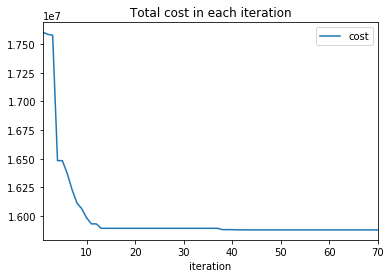

In [9]:
plot_list.plot(x="iteration", y="cost", title='Total cost in each iteration')
plt.savefig('Result/Total cost in each iteration.png')

In [10]:
COST_PV = (PSO.best["variables"]["pv_cap_max"] / 1000) * (np.array(PSO.initial_cost_parameters["It_PV_1kW[yen/year]"]
                                                                   ) + np.array(PSO.initial_cost_parameters["Mt_PV_1kW[yen/year]"]))
COST_Wind = (PSO.best["variables"]["wind_cap_max"]
             * (np.array(PSO.initial_cost_parameters["It_Wind_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Wind_1kW[yen/year]"])))
COST_Diesel = (PSO.best["variables"]["diesel_max"]
               * (np.array(PSO.initial_cost_parameters["It_Diesel_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Diesel_1kW[yen/year]"]))) + np.array(PSO.best["variables"]["Diesel_Cf_sum"] * 20)
COST_Battery = PSO.best["variables"]["battery_cap_max"] * (np.array(
    PSO.initial_cost_parameters["It_Battery_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Battery_1kW[yen/year]"]))

COST = {
    "COST PV": np.round(COST_PV, 2),
    "TOTAL COST PV": np.round(np.sum(COST_PV), 2),
    "LCOE PV": np.round(np.sum(COST_PV)/(20*PSO.best["variables"]["pv_power_sum"]), 2),
    "COST Wind": np.round(COST_Wind, 2),
    "TOTAL COST Wind": np.round(np.sum(COST_Wind), 2),
    "LCOE WIND": np.round(np.sum(COST_Wind)/(20*PSO.best["variables"]["wind_power_sum"]), 2),
    "COST DIESEL": np.round(COST_Diesel, 2),
    "TOTAL COST DIESEL": np.round(np.sum(COST_Diesel), 2),
    "LCOE DIESEL": np.round(np.sum(COST_Diesel)/(20*PSO.best["variables"]["diesel_power_sum"]), 2),
    "COST BATTERY": np.round(COST_Battery, 2),
    "TOTAL COST BATTERY": np.round(np.sum(COST_Battery), 2),
    "LCOE BATTERY": np.round(np.sum(COST_Battery)/(20*PSO.best["variables"]["battery_discharging_power_sum"]), 2),
}

In [11]:
# 計算結果テキストファイルの作成
f = open('Result/PSO_result_parameters.txt', 'w')  # 書き込みモードで開く
f_content = 'LCOE:'+str(np.sum(PSO.best['SCL'])/np.sum(PSO.best['SEL']))+'\nglobal_best_position:'+str(PSO.best['global_best_position'])+'\nglobal_best_fitness_value: '+str(PSO.best['global_best_fitness_value'])+"\nCOST:"+str(COST)+"\nPSO.best[variables]:"\
    + str(PSO.best["variables"]) + '\nPSO.initial_cost_parameters:' + str(
        PSO.initial_cost_parameters)+'\nSCL:'+str(PSO.best['SCL'])+'\nSEL:'+str(PSO.best['SEL'])
f.write(f_content)  # 引数の文字列をファイルに書き込む
f.close()  # ファイルを閉じる

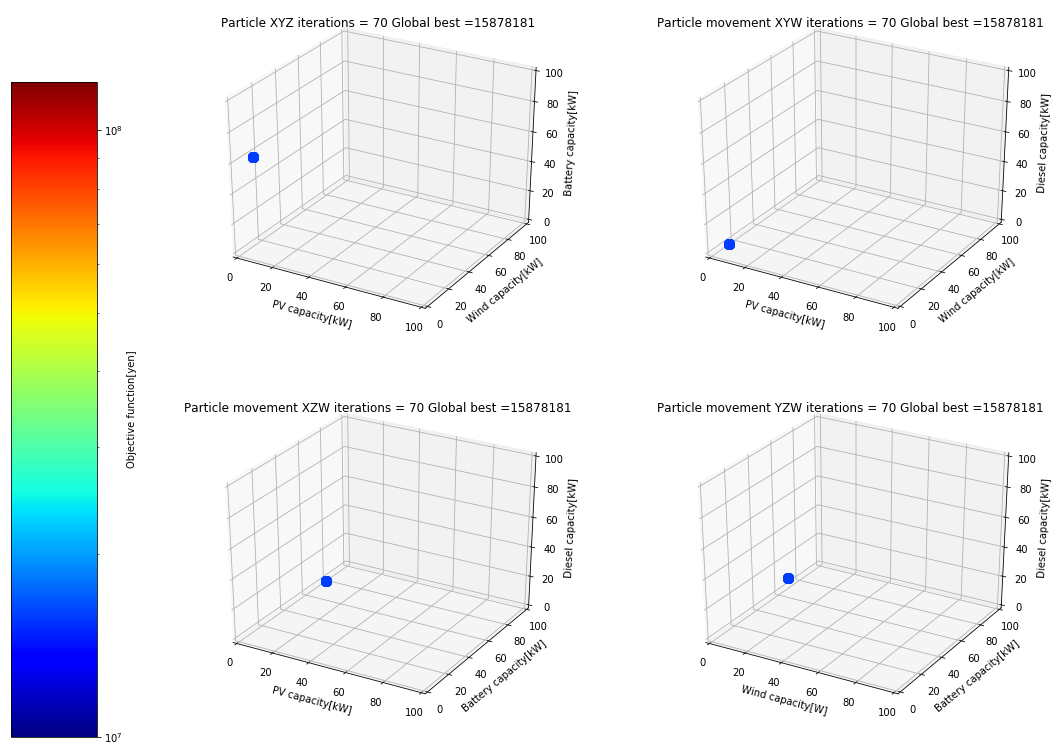

In [22]:
#アニメーションの書き出し
Make_animation("Result/all_particle_data_with_cost.npy")

In [13]:
PSO.best['SCL']

array([8190203.8983379 ,  217742.5011361 ,  217859.30581218,
        217862.04492477, 1105042.09370791,  217862.1106282 ,
        217862.11066347,  217862.1106643 , 1105042.10152302,
        217862.11066431,  217862.11066431,  217862.11066431,
       1105042.10152302,  217862.11066431,  217862.11066431,
        217862.11066431, 1105042.10152302,  217862.11066431,
        217862.11066431,  217862.11066431])

In [14]:
PSO.best['SEL']

array([8922.27097692, 9126.37343629, 9131.26914148, 9131.38394756,
       9131.38663837, 9131.38670143, 9131.38670291, 9131.38670294,
       9131.38670295, 9131.38670295, 9131.38670295, 9131.38670295,
       9131.38670295, 9131.38670295, 9131.38670295, 9131.38670295,
       9131.38670295, 9131.38670295, 9131.38670295, 9131.38670295])

In [15]:
dir(PSO)

['Diesel_Cf',
 'Diesel_fc',
 'SCL',
 'SEL',
 'SOC_max',
 'SOC_min',
 'Target_input',
 'Target_input_len',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all_particle_data',
 'all_particle_data_with_cost',
 'battery_cap_max',
 'battery_charging_power',
 'battery_discharging_power',
 'battery_max',
 'battery_min',
 'battery_need',
 'battery_need_pv',
 'best',
 'best_cost_list',
 'check',
 'df',
 'diesel_max',
 'fitness_variable_parameters',
 'flowchart_parameters',
 'flowchart_root',
 'global_best_fitness_value',
 'global_best_list',
 'global_best_position',
 'h',
 'initial_cost_parameters',
 'initial_input_values',
 'iteration_list',
 'np_PV_efficient',
 'np_Wind_effi